In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv("cleaned_data/combined_bus_silverline_2017_2024.csv")

In [14]:
df.head()

,year,month_of_service,route_or_line,ridership_total,ridership_average
0,2017,2017-01-01 05:00:00+00:00,Bus,8003644.0,242534.0
1,2017,2017-02-01 05:00:00+00:00,Bus,7301412.0,260764.0
2,2017,2017-03-01 05:00:00+00:00,Bus,8595017.0,277259.0
3,2017,2017-04-01 04:00:00+00:00,Bus,8098478.0,269949.0
4,2017,2017-05-01 04:00:00+00:00,Bus,8817889.0,284448.0


In [16]:
# Convert month_of_service column to datetime
df["month_of_service"] = pd.to_datetime(df["month_of_service"])

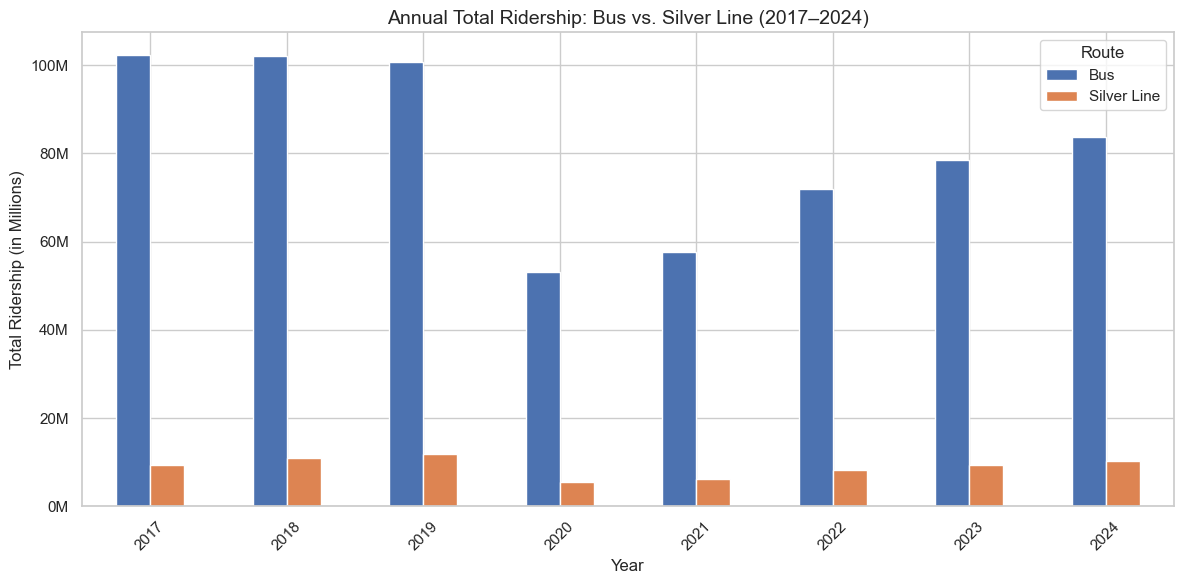

In [17]:
import matplotlib.ticker as ticker

sns.set(style="whitegrid")

# Compute total annual ridership by route_or_line
annual_totals = df.groupby(["year", "route_or_line"])["ridership_total"].sum().reset_index()
annual_pivot = annual_totals.pivot(index="year", columns="route_or_line", values="ridership_total")

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
annual_pivot.plot(kind="bar", stacked=False, ax=ax)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1_000_000:.0f}M")) # Format y-axis in millions

plt.title("Annual Total Ridership: Bus vs. Silver Line (2017–2024)", fontsize=14)
plt.ylabel("Total Ridership (in Millions)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Route")
plt.tight_layout()

plt.show()


In [18]:
# Create a table of annual ridership totals (in millions) 
annual_table = annual_pivot.copy()
annual_table = annual_table.applymap(lambda x: round(x / 1_000_000, 2))  # Convert to millions

display(annual_table)

annual_table.to_csv("annual_total_ridership_table_millions.csv")


/var/folders/4z/9f5g1rf51b1cr06zrmrwfmc40000gn/T/ipykernel_21913/3469264633.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annual_table = annual_table.applymap(lambda x: round(x / 1_000_000, 2))  # Convert to millions


route_or_line,Bus,Silver Line
year,,
2017,102.31,9.34
2018,101.98,11.05
2019,100.77,11.75
2020,53.16,5.59
2021,57.73,6.16
2022,71.87,8.21
2023,78.46,9.36
2024,83.79,10.18


In [21]:
# Calculate percent change from pre-pandemic to post-pandemic
# We define pre-pandemic years as 2017–2019, when MBTA ridership was stable and unaffected by COVID-19.
# Post-pandemic is defined as 2023–2024, reflecting the period when ridership began recovering
# and MBTA implemented major redesigns (e.g., 2023 bus network updates).

pre_pandemic_avg = annual_totals[annual_totals["year"].isin([2017, 2018, 2019])].groupby("route_or_line")["ridership_total"].mean()
post_pandemic_avg = annual_totals[annual_totals["year"].isin([2023, 2024])].groupby("route_or_line")["ridership_total"].mean()

percent_change = ((post_pandemic_avg - pre_pandemic_avg) / pre_pandemic_avg * 100).reset_index()
percent_change.columns = ["route_or_line", "percent_change"]

/var/folders/4z/9f5g1rf51b1cr06zrmrwfmc40000gn/T/ipykernel_21913/2279039302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


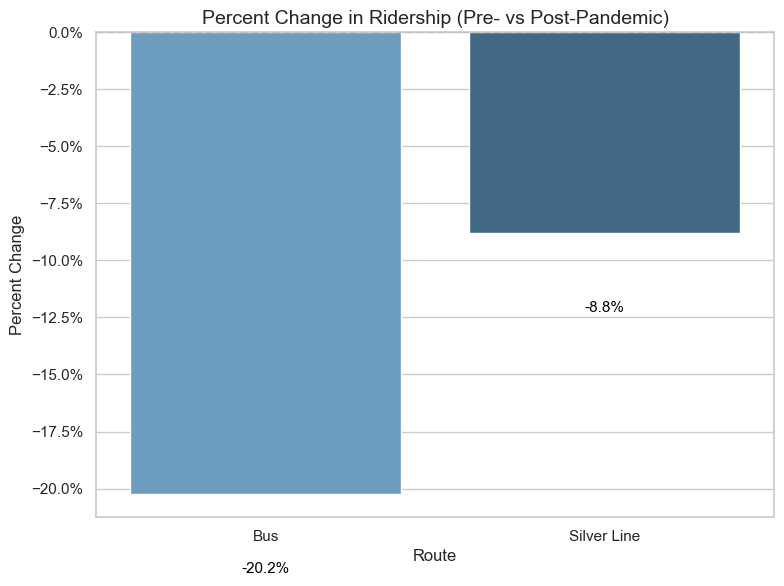

In [23]:
import matplotlib.ticker as mtick

percent_change["label"] = percent_change["percent_change"].apply(lambda x: f"{x:.1f}%")

# Plot percent change
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=percent_change,
    x="route_or_line",
    y="percent_change",
    palette="Blues_d"
)

# Add value labels on bars
for i, row in percent_change.iterrows():
    ax.text(
        i, 
        row["percent_change"] + (1 if row["percent_change"] >= 0 else -3),  # adjust label height
        row["label"],
        color="black",
        ha='center',
        va='bottom' if row["percent_change"] >= 0 else 'top',
        fontsize=11
    )

ax.axhline(0, color="gray", linestyle="--")
ax.set_title("Percent Change in Ridership (Pre- vs Post-Pandemic)", fontsize=14)
ax.set_ylabel("Percent Change", fontsize=12)
ax.set_xlabel("Route", fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.show()



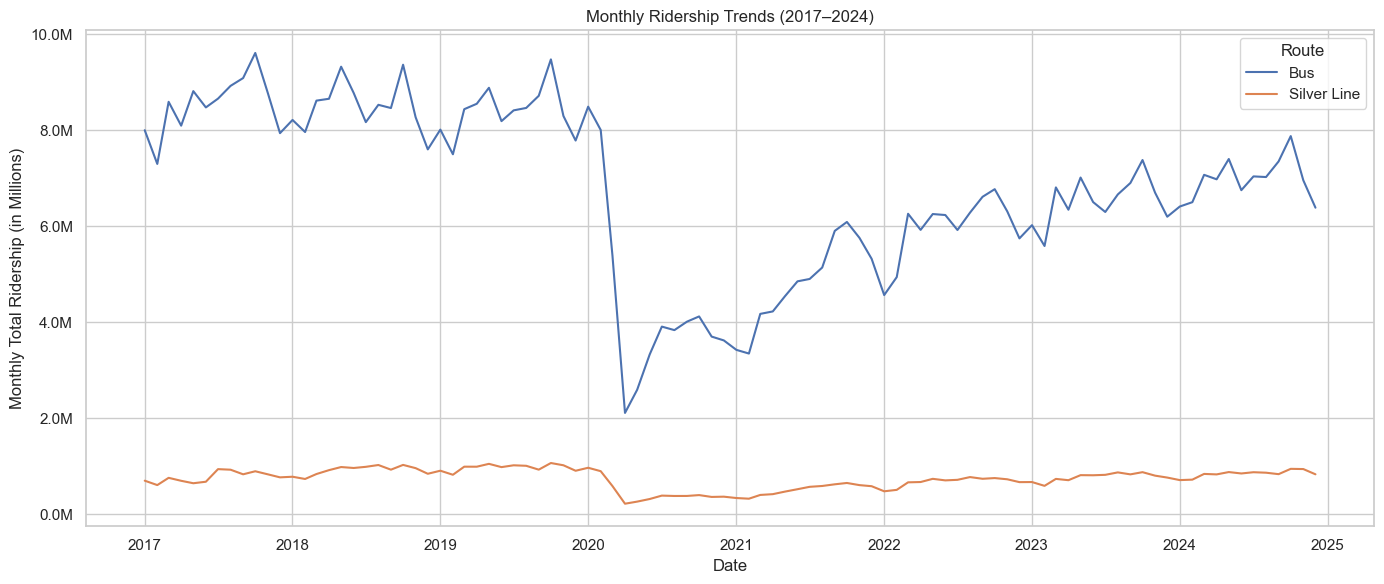

In [25]:
# Plot trends for monthly total ridership, from 2017-2024

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="month_of_service", y="ridership_total", hue="route_or_line")

plt.title("Monthly Ridership Trends (2017–2024)")
plt.ylabel("Monthly Total Ridership (in Millions)")
plt.xlabel("Date")
plt.legend(title="Route")

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.tight_layout()
plt.show()